In [250]:
#import all libraries
import numpy as np 
import matplotlib.pyplot as plt  
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, RobustScaler,StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
from math import sqrt
warnings.filterwarnings('ignore')

In [251]:
# read the file
df2 = pd.read_csv('TIR_combined_90percentiledata_whole.csv')
df = df2.drop(['gene_name'],axis=1)
#df = df.drop(['gene_name','Unnamed: 0','A_count','C_count'],axis=1)
df

,romano_initiation_rate,gene_length,folding_energy_70,folding_energy_80,length of 5prime utr,kozak score,N1,N4,in_frame AUG
0,0.027500,705,-3.8,-4.8,32,7,1,1,0
1,0.027590,443,-12.8,-22.5,66,3,1,2,0
2,0.027750,634,-4,-9.9,113,5,3,1,0
3,0.028250,791,-11,-13.4,145,5,3,1,0
4,0.028400,1133,-8,-11.5,200,5,1,3,0
...,...,...,...,...,...,...,...,...,...
2754,0.193668,734,-11.3,-9.0,17,10,1,1,0
2755,0.195187,734,-11.3,-13.3,17,10,1,1,0
2756,0.191801,734,-13.6,-10.9,17,10,1,1,0
2757,0.210221,734,-11.3,-8.2,17,10,1,1,0


In [252]:
# Converting folding_energy_70 to float
df['folding_energy_70'] = pd.to_numeric(df['folding_energy_70'], errors='coerce')
# Fille NaN to 0 in folding_energy_70
df['folding_energy_70'] = df['folding_energy_70'].fillna(0)

In [253]:
#df = df.drop(['folding_energy_40','folding_energy_5p'], axis=1)

In [254]:
corr = df.corr()
print(corr.romano_initiation_rate.sort_values(ascending=False))

romano_initiation_rate    1.000000
kozak score               0.451888
folding_energy_80         0.272228
folding_energy_70         0.107742
gene_length               0.023751
N1                       -0.011903
N4                       -0.076881
in_frame AUG             -0.125127
length of 5prime utr     -0.308280
Name: romano_initiation_rate, dtype: float64


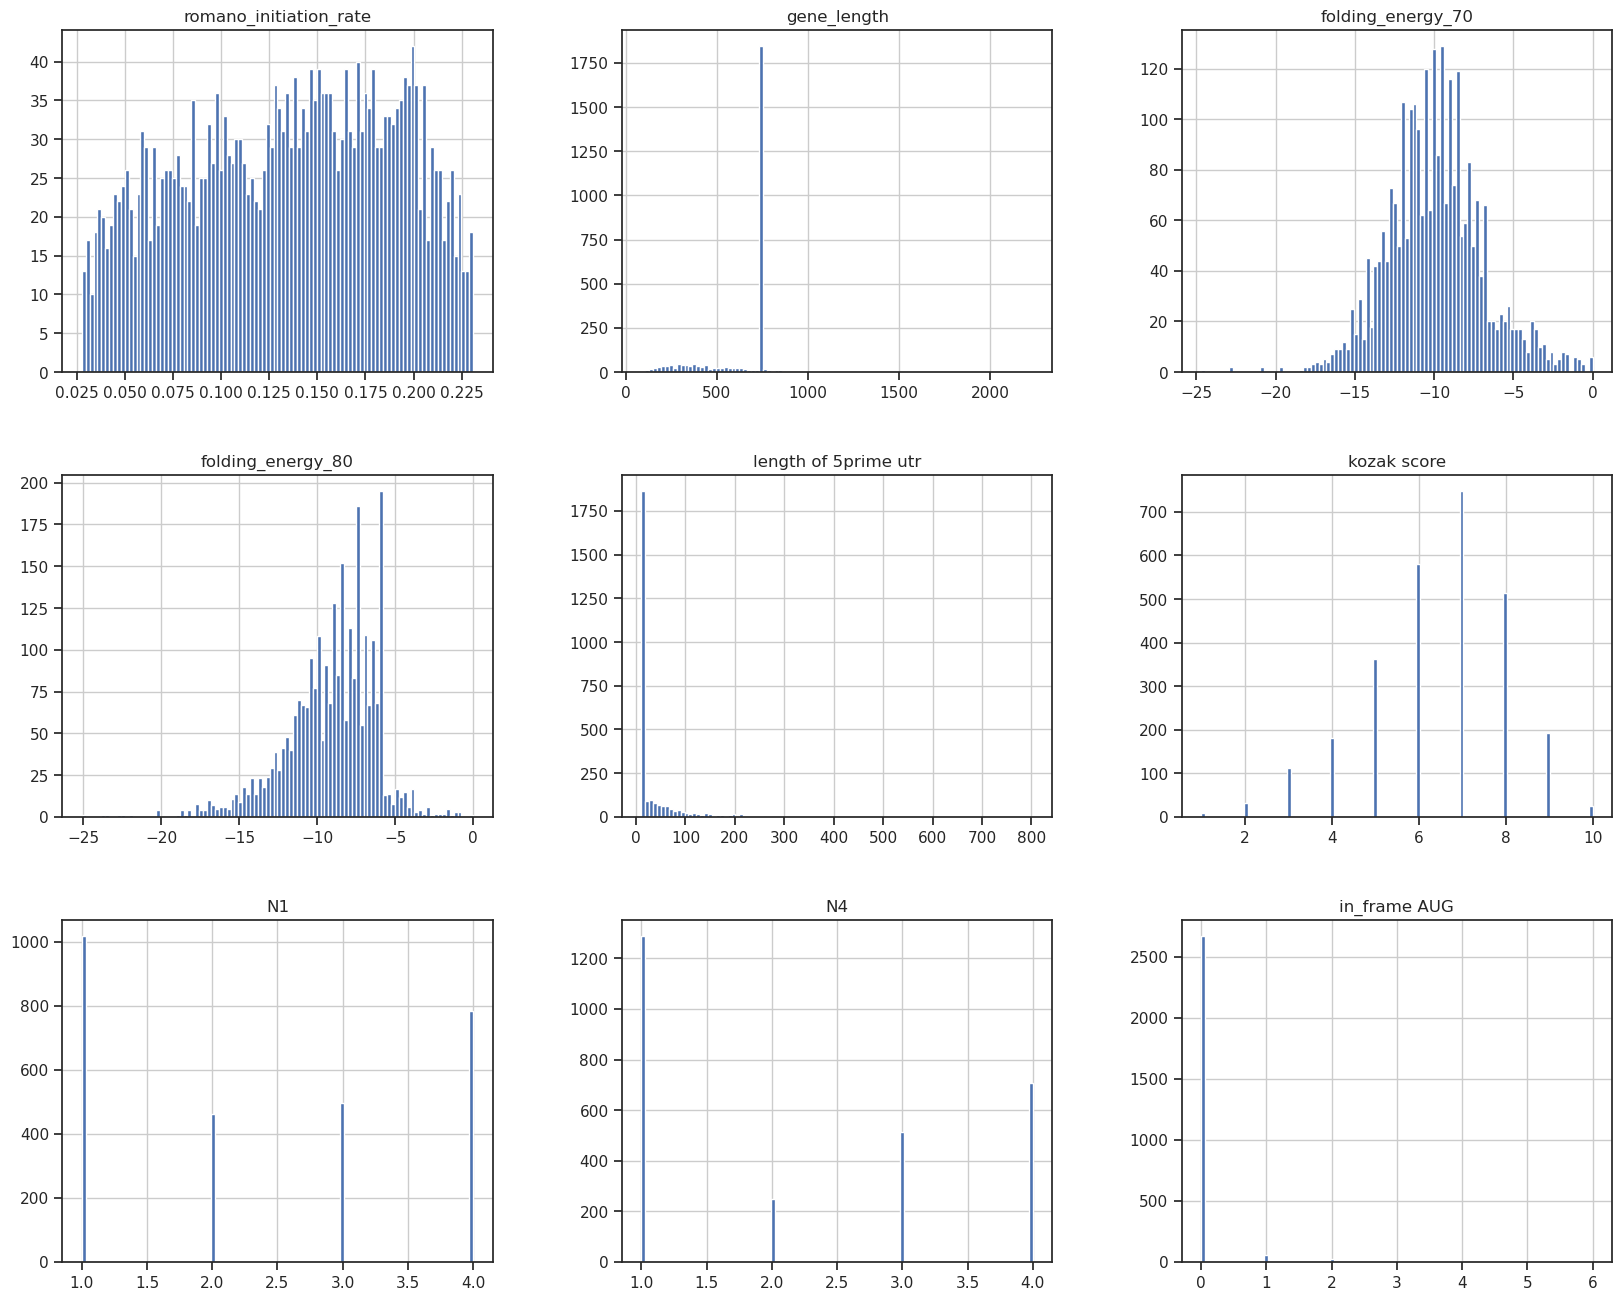

In [255]:
# Histogram plot of the dataframe
df.hist(bins=100, figsize=(20,16))
plt.show()

In [256]:
corr = df.corr()
print(corr.romano_initiation_rate.sort_values(ascending=False))

romano_initiation_rate    1.000000
kozak score               0.451888
folding_energy_80         0.272228
folding_energy_70         0.107742
gene_length               0.023751
N1                       -0.011903
N4                       -0.076881
in_frame AUG             -0.125127
length of 5prime utr     -0.308280
Name: romano_initiation_rate, dtype: float64


In [257]:
# Outlier removal based on histogram plot
df = df[(df['gene_length'] < 1200) & (df['gene_length'] > 100) & ( df['folding_energy_80'] > -17) 
        & ( df['folding_energy_80'] < -2) & (df['folding_energy_70'] > -17) & (df['length of 5prime utr'] < 275)
       ]

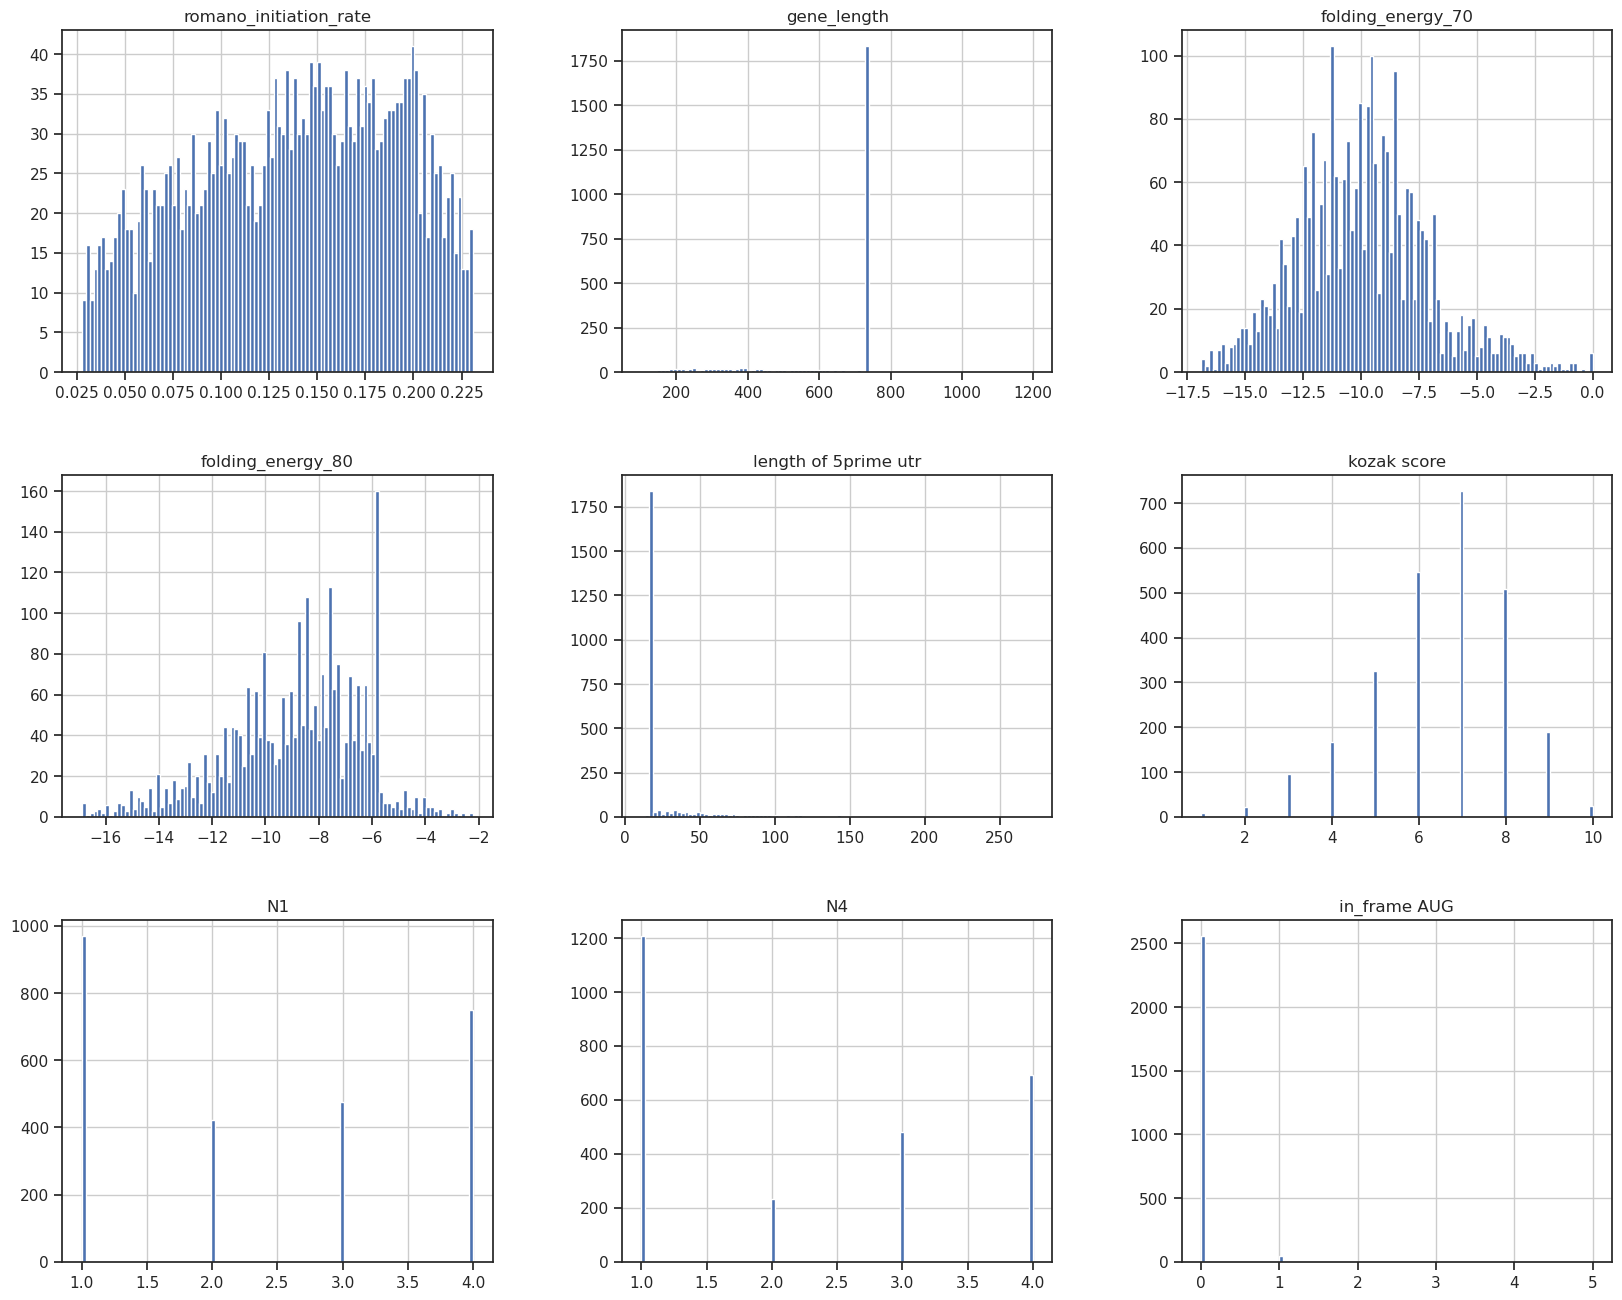

In [258]:
# Histogram plot of the dataframe
df.hist(bins=100, figsize=(20,16))
plt.show()

In [259]:
df.shape

(2617, 9)

In [260]:
1120-len(df)

-1497

In [261]:
corr = df.corr()
print(corr.romano_initiation_rate.sort_values(ascending=False))

romano_initiation_rate    1.000000
kozak score               0.444295
folding_energy_80         0.241308
gene_length               0.137634
folding_energy_70         0.106315
N1                       -0.015665
N4                       -0.091183
in_frame AUG             -0.126808
length of 5prime utr     -0.324125
Name: romano_initiation_rate, dtype: float64


In [262]:
df.columns

Index(['romano_initiation_rate', 'gene_length', 'folding_energy_70',
       'folding_energy_80', 'length of 5prime utr', 'kozak score', 'N1', 'N4',
       'in_frame AUG'],
      dtype='object')

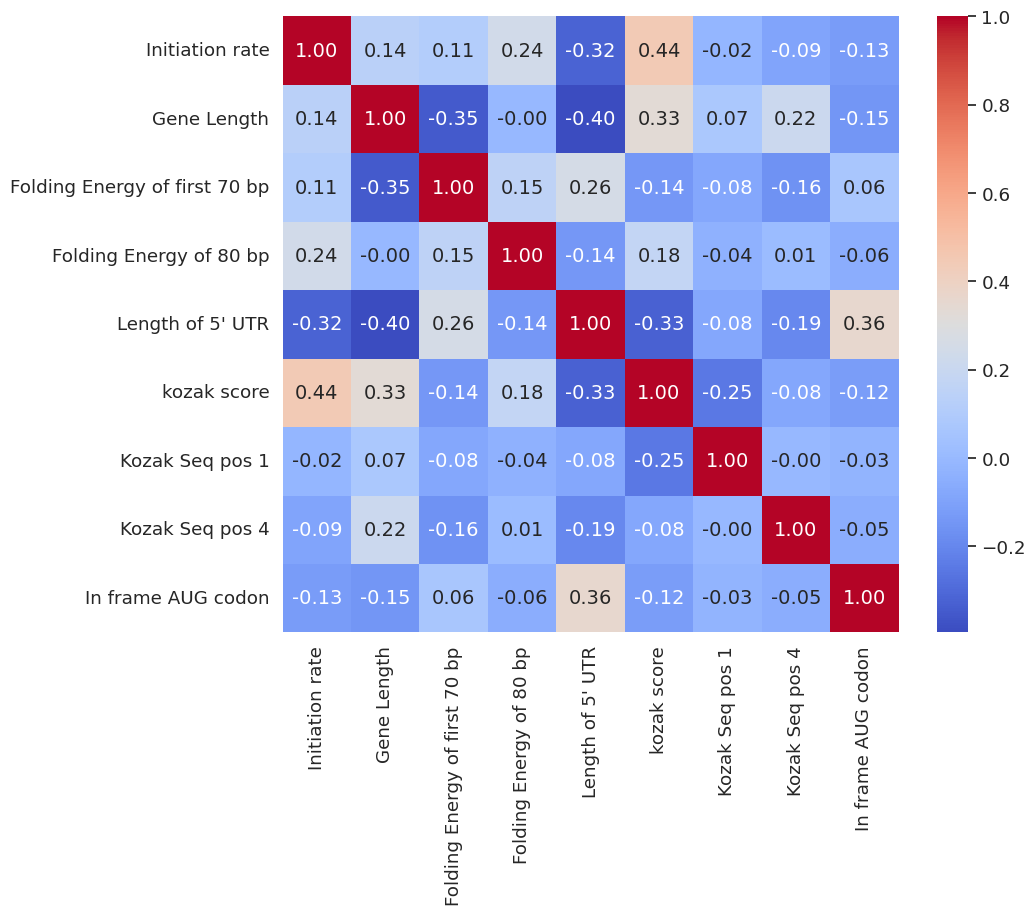

In [263]:

df_corr = df.rename(columns={'romano_initiation_rate': 'Initiation rate','gene_length':'Gene Length',
                    'folding_energy_70' : 'Folding Energy of first 70 bp',
                    'folding_energy_80' : 'Folding Energy of 80 bp', 
                    'length of 5prime utr' : "Length of 5' UTR",
                    'kozak_score': 'Kozak Score', 'N1' : 'Kozak Seq pos 1', 'N4': 'Kozak Seq pos 4',
                    'in_frame AUG': 'In frame AUG codon'}, 
                index={'Initiation rate': 'romano_initiation_rate','gene_length':'Gene Length',
                    'folding_energy_70' : 'Folding Energy of first 70 bp',
                    'folding_energy_80' : 'Folding Energy of 80 bp', 
                    'length of 5prime utr' : "Length of 5' UTR",
                    'kozak_score': 'Kozak Score', 'N1' : 'Kozak Seq pos 1', 'N4': 'Kozak Seq pos 4',
                    'in_frame AUG': 'In frame AUG codon'})

# Calculate correlation matrix
corr = df_corr.corr()

# Create heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={"size": 14}, fmt='.2f', square=True)

# Show plot
plt.show()

In [264]:
X = df.drop('romano_initiation_rate',axis=1)
y = df['romano_initiation_rate']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [266]:
#scaler=StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [267]:
#Randomized Search CV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80,10)]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 4, 6,8, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':[ 'absolute_error','squared_error']}
print(random_grid)

{'n_estimators': [100, 144, 188, 233, 277, 322, 366, 411, 455, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'min_samples_split': [1, 2, 4, 6, 8, 10, 14], 'min_samples_leaf': [1, 2], 'criterion': ['absolute_error', 'squared_error']}


In [268]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,
                               cv=10,verbose=2,n_jobs=-1,random_state=42)

In [269]:
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['absolute_error',
                                                      'squared_error'],
                                        'max_depth': [10, 17, 25, 33, 41, 48,
                                                      56, 64, 72, 80],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [1, 2, 4, 6, 8, 10,
                                                              14],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_

In [270]:
model = rf_randomcv.best_estimator_

In [271]:
# Define the cross validation method
kf = KFold(n_splits=5, shuffle=True)

In [272]:
data_train = pd.DataFrame(columns=['R square', 'Adjusted R square', 'Pearson R', 'MSE', 'MAE'])
data_test = pd.DataFrame(columns=['R square', 'Adjusted R square', 'Pearson R', 'MSE', 'MAE'])
y_test_preds = []  # To store predicted values for each fold
y_test_true = []  # To store true values for each fold

for train_index, test_index in kf.split(X):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

    ####### Train Set
    # Model Prediction
    y_train_pred = model.predict(X1_train)
    # R square
    r_sq_train = r2_score(y1_train, y_train_pred)
    # Adjusted R square
    adjusted_r_sq_train = 1 - (1 - r2_score(y1_train, y_train_pred)) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    # Pearson R
    r_train, _ = pearsonr(y1_train, y_train_pred)
    # Mean Squared Error
    mse_train = mean_squared_error(y1_train, y_train_pred)
    # Mean Absolute Error
    mae_train = mean_absolute_error(y1_train, y_train_pred)

    ####### Test Set
    # Model Prediction
    y_test_pred = model.predict(X1_test)
    # R square
    r_sq_test = r2_score(y1_test, y_test_pred)
    # Adjusted R square
    adjusted_r_sq_test = 1 - (1 - r2_score(y1_test, y_test_pred)) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    # Pearson R
    r_test, _ = pearsonr(y1_test, y_test_pred)
    # Mean Squared Error
    mse_test = mean_squared_error(y1_test, y_test_pred)
    # Mean Absolute Error
    mae_test = mean_absolute_error(y1_test, y_test_pred)

    data_train = pd.concat([data_train, pd.DataFrame({'R square': r_sq_train, 'Adjusted R square': adjusted_r_sq_train,
                                                      'Pearson R': r_train, 'MSE': mse_train, 'MAE': mae_train},
                                                     index=[0])], ignore_index=True)
    data_test = pd.concat([data_test, pd.DataFrame({'R square': r_sq_test, 'Adjusted R square': adjusted_r_sq_test,
                                                    'Pearson R': r_test, 'MSE': mse_test, 'MAE': mae_test},
                                                   index=[0])], ignore_index=True)

    y_test_preds.append(pd.Series(y_test_pred, index=y1_test.index))  # Append predicted values of the test set for each fold
    y_test_true.append(pd.Series(y1_test, index=y1_test.index))  # Append true values of the test set for each fold

print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)


data = pd.DataFrame({'True Values': pd.concat(y_test_true, axis=0).reset_index(drop=True),
                             'Predicted Values': pd.concat(y_test_preds, axis=0).reset_index(drop=True)})


(2094, 8) (2094,)
(523, 8) (523,)


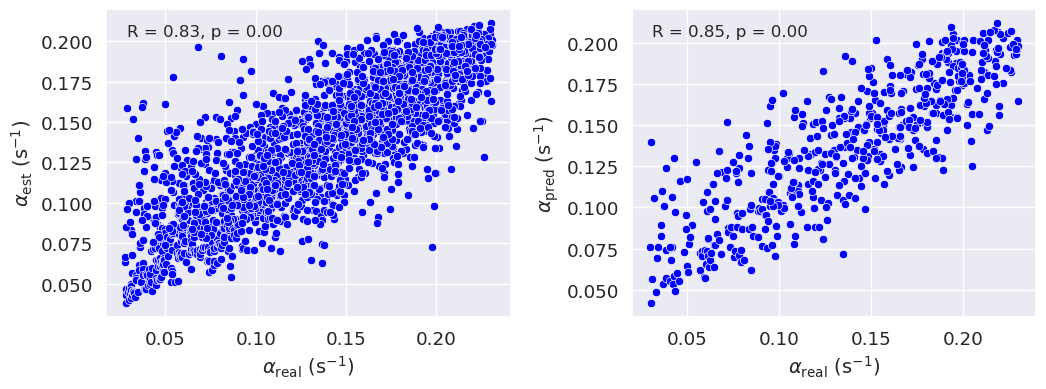

In [273]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# Training set
sns.scatterplot(y1_train, y_train_pred, color='blue', ax=ax1)
ax1.set_xlabel(r"$\alpha_\mathrm{real}\ (\mathrm{s^{-1}})$", fontsize=14)
ax1.set_ylabel(r"$\alpha_\mathrm{est}\ (\mathrm{s^{-1}})$", fontsize=14)
ax1.ticklabel_format(style='plain')
r_train, p_train = pearsonr(y1_train, y_train_pred)
ax1.text(0.05, 0.95, f"R = {r_train:.2f}, p = {p_train:.2f}", transform=ax1.transAxes, fontsize=12, verticalalignment='top')

# Test set
sns.scatterplot(y1_test, y_test_pred, color='blue', ax=ax2)
ax2.set_xlabel(r"$\alpha_\mathrm{real}\ (\mathrm{s^{-1}})$", fontsize=14)
ax2.set_ylabel(r"$\alpha_\mathrm{pred}\ (\mathrm{s^{-1}})$", fontsize=14)
ax2.ticklabel_format(style='plain')
r_test, p_test = pearsonr(y1_test, y_test_pred)
ax2.text(0.05, 0.95, f"R = {r_test:.2f}, p = {p_test:.2f}", transform=ax2.transAxes, fontsize=12, verticalalignment='top')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

Text(0.95, 0.95, 'Test set')

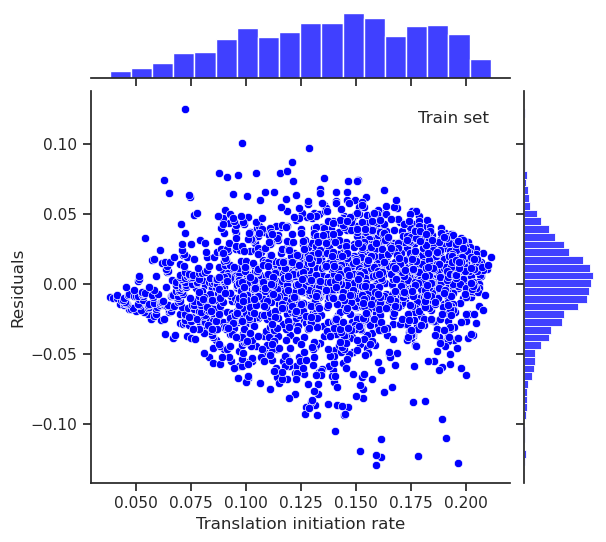

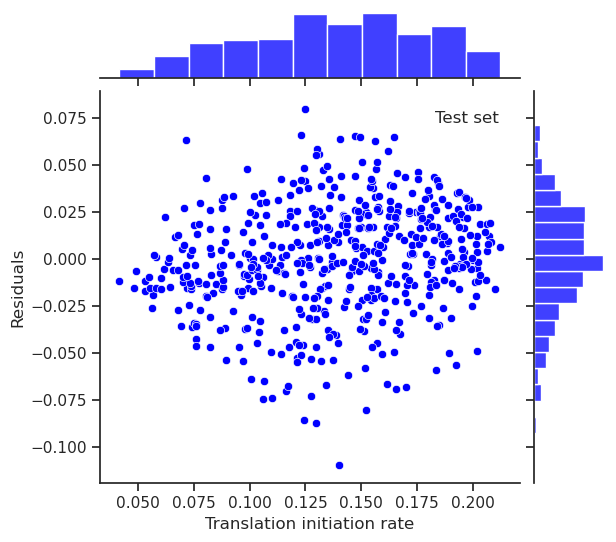

In [274]:
residuals = y1_train - y_train_pred

plot_data = pd.DataFrame()
plot_data['Residuals'] = residuals.ravel()
plot_data['Translation initiation rate'] = y_train_pred.ravel()

sns.set(style="ticks", font_scale=1)
ax = sns.jointplot(y='Residuals', x='Translation initiation rate', color='blue', data=plot_data, kind="scatter", height=6)
ax.fig.subplots_adjust(top=0.9)
ax.ax_joint.text(0.95, 0.95, "Train set", transform=ax.ax_joint.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

residuals = y1_test - y_test_pred

plot_data = pd.DataFrame()
plot_data['Residuals'] = residuals.ravel()
plot_data['Translation initiation rate'] = y_test_pred.ravel()

sns.set(style="ticks", font_scale=1)
ax = sns.jointplot(y='Residuals', x='Translation initiation rate', color='blue', data=plot_data, kind="scatter", height=6)
ax.fig.subplots_adjust(top=0.9)
ax.ax_joint.text(0.95, 0.95, "Test set", transform=ax.ax_joint.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

## Save Model as Pickle Object

In [275]:
import pickle
pickle.dump(model, open('tir_rf_model.pkl', 'wb'))

## Comparison with other datasets

In [276]:
data

,True Values,Predicted Values
0,0.029700,0.039558
1,0.031260,0.045754
2,0.031680,0.067881
3,0.032280,0.045035
4,0.032800,0.043974
...,...,...
2612,0.145617,0.134369
2613,0.211114,0.193731
2614,0.229243,0.196568
2615,0.081939,0.143798


In [277]:
df2

,gene_name,romano_initiation_rate,gene_length,folding_energy_70,folding_energy_80,length of 5prime utr,kozak score,N1,N4,in_frame AUG
0,YEL011W,0.027500,705,-3.8,-4.8,32,7,1,1,0
1,YCR079W,0.027590,443,-12.8,-22.5,66,3,1,2,0
2,YBR021W,0.027750,634,-4,-9.9,113,5,3,1,0
3,YDR034C,0.028250,791,-11,-13.4,145,5,3,1,0
4,YKL105C,0.028400,1133,-8,-11.5,200,5,1,3,0
...,...,...,...,...,...,...,...,...,...,...
2754,RPL8A+YFP,0.193668,734,-11.3,-9.0,17,10,1,1,0
2755,RPL8A+YFP,0.195187,734,-11.3,-13.3,17,10,1,1,0
2756,RPL8A+YFP,0.191801,734,-13.6,-10.9,17,10,1,1,0
2757,RPL8A+YFP,0.210221,734,-11.3,-8.2,17,10,1,1,0


In [278]:
gene_name_new = []

for i in range(len(data)):
    if data['True Values'][i] in df2['romano_initiation_rate'].values:
        gene_name_new.append(df2.loc[df2['romano_initiation_rate'] == data['True Values'][i], 'gene_name'].iloc[0])
    else:
        gene_name_new.append(None)

data['gene_name'] = gene_name_new

# Removing gene RPL8A+YFP
data = data[data['gene_name'] != 'RPL8A+YFP']
data

,True Values,Predicted Values,gene_name
0,0.02970,0.039558,YAL040C
1,0.03126,0.045754,YJL073W
2,0.03168,0.067881,YJL090C
3,0.03228,0.045035,YML065W
4,0.03280,0.043974,YKL020C
...,...,...,...
2265,0.21774,0.188906,YGL058W
2266,0.22201,0.175497,YGR285C
2267,0.22449,0.184109,YBR196C
2268,0.22604,0.182421,YER011W


In [279]:
df3 = pd.read_csv('data_final - data_final.csv')
df3 = df3.drop(['s_no.'], axis=1)
df3

,gene,romano_initiation_rate,gene_length,weinberg_initiation_rate,dou_duck_initiation_rate,metabolic_cost,cai,mRNA_half_life,protein_copy_number,protein_per_mRNA,...,N7,N8,N9,N10,N11,N12,GC,frac_GC,in_frame_AUG,out_frame_AUG
0,YAL008W,0.15050,199,0.276835,NaN,28.721106,0.115,27.5,1993.64239,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YBR255W,0.03368,695,NaN,NaN,25.125899,0.111,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YGR164W,0.27984,112,NaN,NaN,28.750000,0.119,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YGR131W,0.22936,175,NaN,NaN,28.242857,0.102,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNL003C,0.09958,285,NaN,NaN,26.849123,0.115,4.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6664,YPR117W,0.02378,2490,NaN,NaN,27.781526,0.122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6665,YHR086W,0.05300,524,NaN,NaN,24.621183,0.124,5.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666,YBR015C,0.14430,598,0.067900,0.063924,27.790134,0.170,4.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6667,YPL013C,0.26796,122,0.117000,NaN,25.950820,0.087,4.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
weinberg_initiation_rate = []

for gene_name in data['gene_name']:
    if gene_name in df3['gene'].values:
        weinberg_initiation_rate.append(df3.loc[df3['gene'] == gene_name, 'weinberg_initiation_rate'].iloc[0])
    else:
        weinberg_initiation_rate.append(None)

df4 = data.copy() 
df4['weinberg_initiation_rate'] = weinberg_initiation_rate[:len(data)]  
df4 = df4[df4['weinberg_initiation_rate'] <= 0.25]
df4 = df4.dropna()
df4

,True Values,Predicted Values,gene_name,weinberg_initiation_rate
13,0.04429,0.072098,YDL020C,0.069500
40,0.06666,0.068876,YGR178C,0.071200
45,0.06944,0.068166,YIL109C,0.083000
46,0.06968,0.139977,YKL024C,0.102061
51,0.07338,0.070823,YDR194C,0.036000
...,...,...,...,...
2258,0.19943,0.174377,YNL160W,0.191000
2260,0.20089,0.195149,YLR354C,0.153295
2262,0.20498,0.124926,YHR183W,0.159000
2266,0.22201,0.175497,YGR285C,0.114000


In [281]:
dou_duck_initiation_rate = []

for gene_name in data['gene_name']:
    if gene_name in df3['gene'].values:
        dou_duck_initiation_rate.append(df3.loc[df3['gene'] == gene_name, 'dou_duck_initiation_rate'].iloc[0])
    else:
        dou_duck_initiation_rate.append(None)
df5 = data.copy() 
df5['dou_duck_initiation_rate'] = dou_duck_initiation_rate[:len(data)]  
df5 = df5.dropna()
df5

,True Values,Predicted Values,gene_name,dou_duck_initiation_rate
40,0.06666,0.068876,YGR178C,0.062224
45,0.06944,0.068166,YIL109C,0.072885
46,0.06968,0.139977,YKL024C,0.102146
52,0.07340,0.064398,YNL327W,0.069922
59,0.07688,0.114320,YOR197W,0.088720
...,...,...,...,...
2257,0.19346,0.162590,YFR044C,0.084494
2260,0.20089,0.195149,YLR354C,0.155440
2262,0.20498,0.124926,YHR183W,0.153910
2266,0.22201,0.175497,YGR285C,0.125086


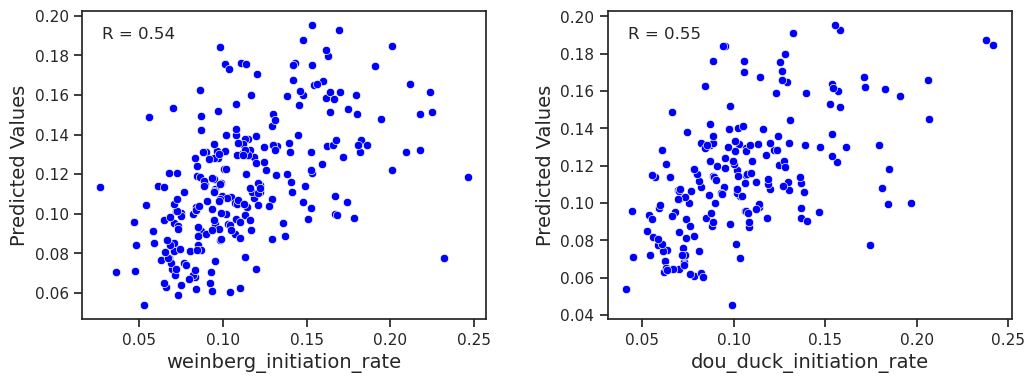

[CV] END criterion=squared_error, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=366; total time=   2.1s
[CV] END criterion=absolute_error, max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=411; total time=  21.8s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=144; total time=   3.0s
[CV] END criterion=squared_error, max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   1.9s
[CV] END criterion=absolute_error, max_depth=33, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=366; total time=  10.6s
[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=188; total time=   1.3s
[CV] END criterion=absolute_error, max_depth=48, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=188

[CV] END criterion=squared_error, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=188; total time=   1.2s
[CV] END criterion=squared_error, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=144; total time=   0.7s
[CV] END criterion=squared_error, max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=144; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=411; total time=  22.0s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=144; total time=   3.1s
[CV] END criterion=absolute_error, max_depth=48, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=233; total time=   6.9s
[CV] END criterion=absolute_error, max_depth=48, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=366

[CV] END criterion=squared_error, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=233; total time=   0.9s
[CV] END criterion=absolute_error, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=233; total time=  12.4s
[CV] END criterion=squared_error, max_depth=33, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=144; total time=   0.4s
[CV] END criterion=squared_error, max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=188; total time=   0.7s
[CV] END criterion=absolute_error, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=188; total time=   4.4s
[CV] END criterion=absolute_error, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=411; total time=  11.9s
[CV] END criterion=absolute_error, max_depth=33, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=322;

[CV] END criterion=absolute_error, max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=455; total time=   0.3s
[CV] END criterion=absolute_error, max_depth=33, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=  11.9s
[CV] END criterion=absolute_error, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=188; total time=   5.7s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=455; total time=  12.6s
[CV] END criterion=squared_error, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=188; total time=   0.7s
[CV] END criterion=absolute_error, max_depth=33, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=322; total time=   0.2s
[CV] END criterion=absolute_error, max_depth=33, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=322

[CV] END criterion=squared_error, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=188; total time=   1.0s
[CV] END criterion=squared_error, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=144; total time=   0.6s
[CV] END criterion=squared_error, max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=144; total time=   0.5s
[CV] END criterion=squared_error, max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=144; total time=   0.4s
[CV] END criterion=absolute_error, max_depth=41, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=233; total time=  13.7s
[CV] END criterion=squared_error, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=411; total time=   2.3s
[CV] END criterion=squared_error, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=233;

[CV] END criterion=squared_error, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=366; total time=   2.1s
[CV] END criterion=absolute_error, max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=411; total time=  21.7s
[CV] END criterion=absolute_error, max_depth=72, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=144; total time=   3.9s
[CV] END criterion=absolute_error, max_depth=72, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=277; total time=   6.7s
[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=277; total time=   0.8s
[CV] END criterion=absolute_error, max_depth=48, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   2.3s
[CV] END criterion=squared_error, max_depth=72, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=

[CV] END criterion=squared_error, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=233; total time=   0.9s
[CV] END criterion=absolute_error, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=233; total time=  13.0s
[CV] END criterion=absolute_error, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=188; total time=   4.4s
[CV] END criterion=absolute_error, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=366; total time=  10.1s
[CV] END criterion=absolute_error, max_depth=33, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=366; total time=  10.8s
[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=188; total time=   1.3s
[CV] END criterion=absolute_error, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=500

[CV] END criterion=squared_error, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=144; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=33, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=  12.0s
[CV] END criterion=absolute_error, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=188; total time=   5.8s
[CV] END criterion=squared_error, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=233; total time=   0.8s
[CV] END criterion=absolute_error, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=366; total time=  10.4s
[CV] END criterion=squared_error, max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=455; total time=   1.5s
[CV] END criterion=squared_error, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=188;

[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=233; total time=  12.8s
[CV] END criterion=absolute_error, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=188; total time=   5.4s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=455; total time=  12.6s
[CV] END criterion=squared_error, max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=455; total time=   1.5s
[CV] END criterion=absolute_error, max_depth=41, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=322; total time=   6.8s
[CV] END criterion=squared_error, max_depth=72, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=144; total time=   0.8s
[CV] END criterion=absolute_error, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=23

[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=233; total time=  12.6s
[CV] END criterion=squared_error, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=188; total time=   0.8s
[CV] END criterion=squared_error, max_depth=72, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=188; total time=   0.7s
[CV] END criterion=squared_error, max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=188; total time=   0.7s
[CV] END criterion=absolute_error, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=188; total time=   4.4s
[CV] END criterion=absolute_error, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=411; total time=  11.9s
[CV] END criterion=squared_error, max_depth=56, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=188; 

[CV] END criterion=squared_error, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=366; total time=   2.2s
[CV] END criterion=absolute_error, max_depth=41, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=233; total time=  14.1s
[CV] END criterion=squared_error, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=411; total time=   2.3s
[CV] END criterion=absolute_error, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=366; total time=  10.2s
[CV] END criterion=absolute_error, max_depth=33, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=366; total time=  10.7s
[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=188; total time=   1.3s
[CV] END criterion=absolute_error, max_depth=48, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=18

[CV] END criterion=squared_error, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=233; total time=   0.9s
[CV] END criterion=absolute_error, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=233; total time=  12.4s
[CV] END criterion=squared_error, max_depth=33, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=144; total time=   0.4s
[CV] END criterion=squared_error, max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=188; total time=   0.7s
[CV] END criterion=squared_error, max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=322; total time=   0.9s
[CV] END criterion=squared_error, max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=322; total time=   0.9s
[CV] END criterion=squared_error, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=411;

[CV] END criterion=squared_error, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=144; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=33, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=411; total time=  24.7s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=144; total time=   3.0s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=500; total time=   0.3s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=500; total time=   0.3s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=500; total time=   0.3s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=500; to

[CV] END criterion=squared_error, max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=233; total time=   0.9s
[CV] END criterion=absolute_error, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=233; total time=  12.3s
[CV] END criterion=squared_error, max_depth=33, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=144; total time=   0.4s
[CV] END criterion=squared_error, max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=188; total time=   0.7s
[CV] END criterion=squared_error, max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=322; total time=   1.0s
[CV] END criterion=squared_error, max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=322; total time=   0.9s
[CV] END criterion=squared_error, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=411;

In [282]:
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# Scatter plot for the first subplot
sns.scatterplot(df4['weinberg_initiation_rate'], df4['Predicted Values'], color='blue', ax=ax1)
ax1.set_xlabel(r"weinberg_initiation_rate", fontsize=14)
ax1.set_ylabel(r"Predicted Values", fontsize=14)
ax1.ticklabel_format(style='plain')
r1, p1 = pearsonr(df4['weinberg_initiation_rate'], df4['Predicted Values'])
ax1.text(0.05, 0.95, f"R = {r1:.2f}", transform=ax1.transAxes, fontsize=12, verticalalignment='top')

# Scatter plot for the second subplot
sns.scatterplot(df5['dou_duck_initiation_rate'], df5['Predicted Values'], color='blue', ax=ax2)
ax2.set_xlabel(r"dou_duck_initiation_rate", fontsize=14)
ax2.set_ylabel(r"Predicted Values", fontsize=14)
ax2.ticklabel_format(style='plain')
r2, p2 = pearsonr(df5['dou_duck_initiation_rate'], df5['Predicted Values'])
ax2.text(0.05, 0.95, f"R = {r2:.2f}", transform=ax2.transAxes, fontsize=12, verticalalignment='top')


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
